#  Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


### Getting dataset info through head cells

In [85]:
data = pd.read_csv('Rdata.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Exploring the data

In [86]:
data.shape

(4340, 8)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [88]:
print(data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


### Data Preprocessing

In [89]:
data = data.drop(['seller_type', 'owner'], axis=1)

if data.isnull().sum().any():
    data = data.dropna()

current_year = 2025
data['car_age'] = current_year - data['year']
data = data.drop('year', axis=1)

categorical_col = ['name', 'fuel', 'transmission']
data_encoded = pd.get_dummies(data, columns=categorical_col, drop_first=True)

data_encoded.head()

,selling_price,km_driven,car_age,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,name_Volkswagen Vento Petrol Highline AT,name_Volvo V40 D3 R Design,name_Volvo XC 90 D5 Inscription BSIV,name_Volvo XC60 D3 Kinetic,name_Volvo XC60 D5 Inscription,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual
0,60000,70000,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,135000,50000,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,600000,100000,13,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,250000,46000,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,450000,141000,11,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


### Relation between data through Graphs

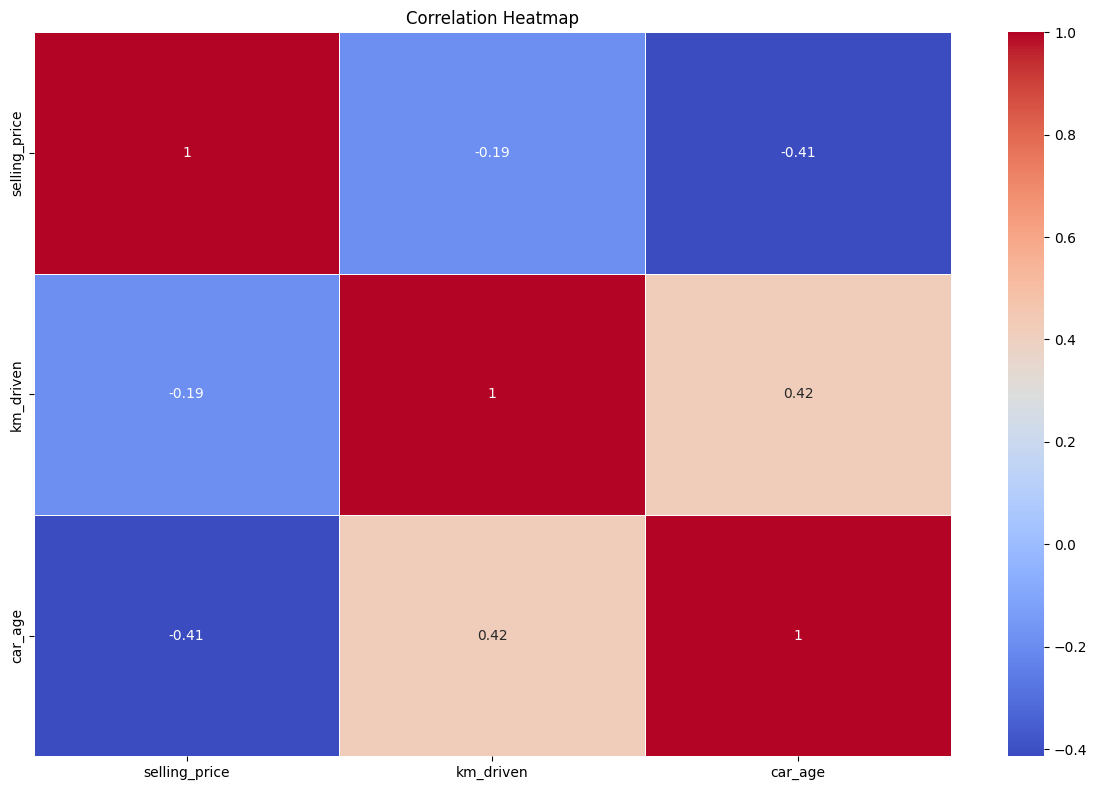

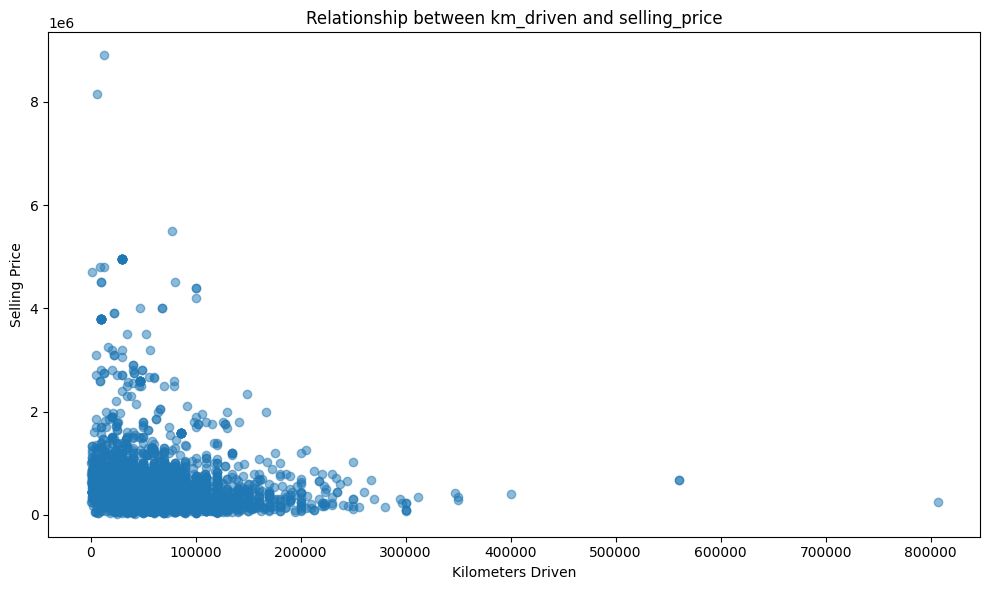

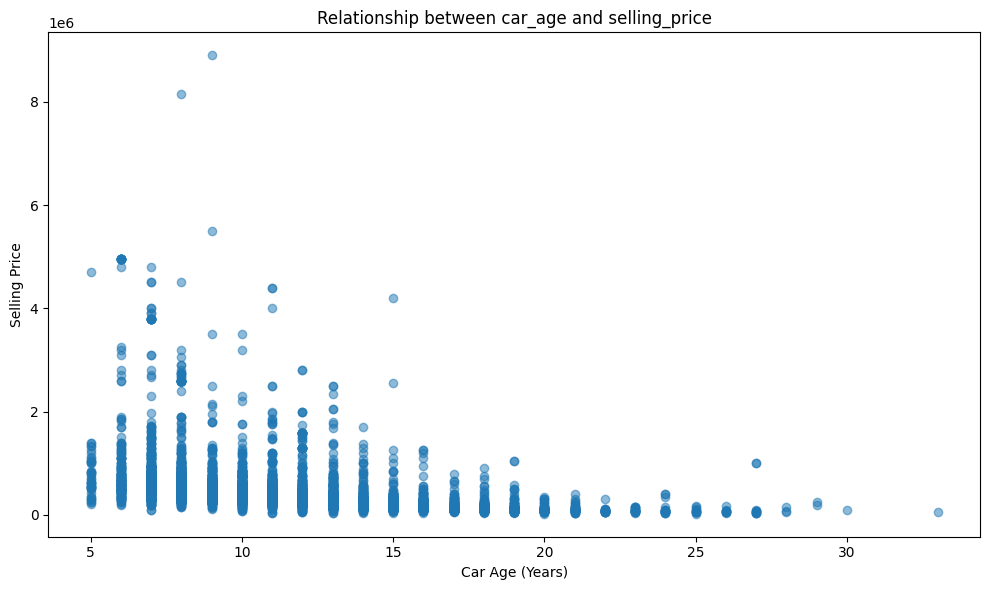

In [90]:
correlation = data_encoded.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['km_driven'], data['selling_price'], alpha=0.5)
plt.title('Relationship between km_driven and selling_price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['car_age'], data['selling_price'], alpha=0.5)
plt.title('Relationship between car_age and selling_price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

### Splitting Data into Training and Testing

In [91]:
X = data_encoded.drop('selling_price', axis=1)
y = data_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3472, 1497)
Testing set shape: (868, 1497)


### Building Model

In [92]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluating the model

Mean Squared Error: 122952943987.87677
Root Mean Squared Error: 350646.46581404004
R-squared: 0.5971005383079468


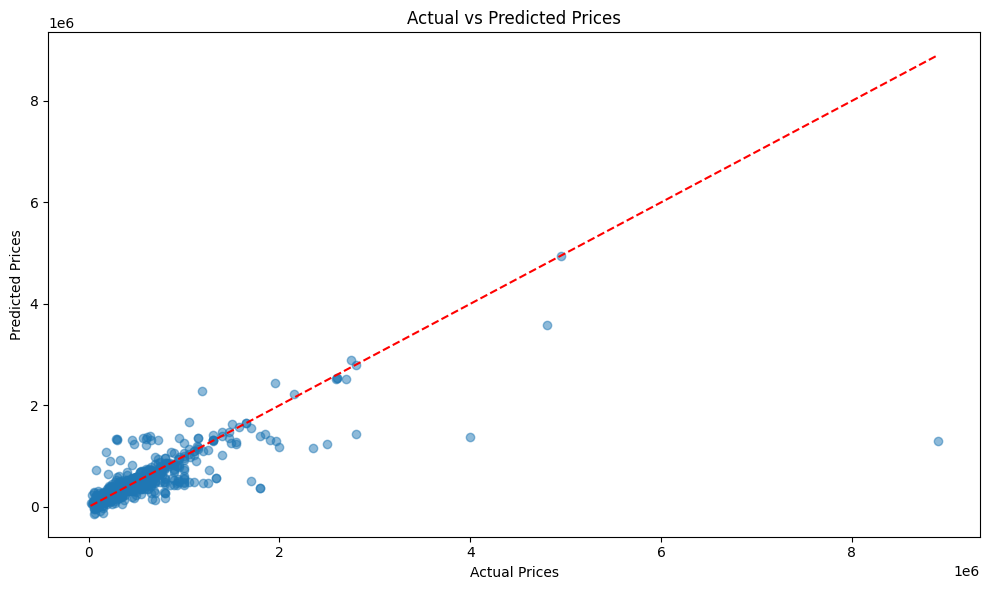

In [93]:
import numpy as np
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()